# Some example SDFITSIO operations with masking


In [18]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt


import sdfitsio as sdf
from importlib import reload
reload(sdf);

Create a masked array 'a' with a typical LMT structure

In [2]:
ntime = 1000
nbeam = 16
npol = 2
nband = 6
nchan = 256

adim=(ntime,nbeam,npol,nband,nchan)
%time a = sdf.gen_data(adim)

print('Size of data',sdf.dimsize(adim))

looping data2 + g
CPU times: user 3.62 s, sys: 104 ms, total: 3.72 s
Wall time: 3.72 s
Size of data 49152000


Write it as SDFITS

In [3]:
%time sdf.my_write_sdfits('junk.fits',a)

SHAPE= (1000, 16, 2, 6, 256)
NAXIS2= 192000
NCHAN= 256
All data good, no masking operation needed
(192000,)
(192000, 256)
Written junk.fits
CPU times: user 830 ms, sys: 485 ms, total: 1.31 s
Wall time: 1.31 s


Set up a masking operation. Low level method. Any dimensions skipped, imply all elements are selected, i.e. [:]

In [4]:
mask = {}
mask[0] = '0:110'     # time 
#mask[1] = '3'        # beam
#mask[2] = '0'        # pol
#mask[3] = '4'        # band
mask[4] = '81:83'    # chan


In [5]:
%time sdf.data_mask(a, mask)


DATA_MASK:  {0: '0:110', 4: '81:83'}
CMD: data.mask[0:110,:,:,:,81:83] = True
CPU times: user 2.81 ms, sys: 334 µs, total: 3.14 ms
Wall time: 1.44 ms


Report what fraction was masked

In [6]:
%time sdf.data_masked(a)

data_masked: 42240 / 49152000 = 0.0859375%
CPU times: user 137 ms, sys: 16.1 ms, total: 153 ms
Wall time: 151 ms


In [7]:
%time sdf.my_write_sdfits('junk_masked.fits',a)

SHAPE= (1000, 16, 2, 6, 256)
NAXIS2= 192000
NCHAN= 256
Some data masked, using a copy to write
(192000,)
(192000, 256)
Written junk_masked.fits
CPU times: user 697 ms, sys: 509 ms, total: 1.21 s
Wall time: 1.2 s


Read back the original unmasked

In [8]:
%time b=sdf.my_read('junk.fits')

File:      junk.fits
Size:      4 cols x 192000 rows
Telescope: LMT/GTM
Object:    ['NOISE']
DateObs:   0.0
DIMS2: (1000, 16, 2, 6, 256)
(192000, 256)
(1000, 16, 2, 6, 256)
Data.sum() =  5819853.0
CPU times: user 310 ms, sys: 23.6 ms, total: 334 ms
Wall time: 328 ms


In [9]:
b.shape

(1000, 16, 2, 6, 256)

In [10]:
%time sdf.data_masked(b)

data_masked: 0 / 49152000 = 0%
CPU times: user 139 ms, sys: 11.8 ms, total: 151 ms
Wall time: 149 ms


In [11]:
%time c = sdf.my_read('junk_masked.fits')

File:      junk_masked.fits
Size:      4 cols x 192000 rows
Telescope: LMT/GTM
Object:    ['NOISE']
DateObs:   0.0
DIMS2: (1000, 16, 2, 6, 256)
(192000, 256)
(1000, 16, 2, 6, 256)
Data.sum() =  nan
CPU times: user 295 ms, sys: 19.8 ms, total: 315 ms
Wall time: 309 ms


In [12]:
%time sdf.data_masked(c)

data_masked: 42240 / 49152000 = 0.0859375%
CPU times: user 137 ms, sys: 16.4 ms, total: 154 ms
Wall time: 154 ms


Indeed, the masking have now been applied (as NaN) in the SDFITS file. masks cannot be undone here, since we did not save the masks. Thus users are encouraged to save them seperately.

(1000, 16, 2, 6, 256)
1.0011396859216972 0.009273555259613677 107.95640484094157 438.1780460041329


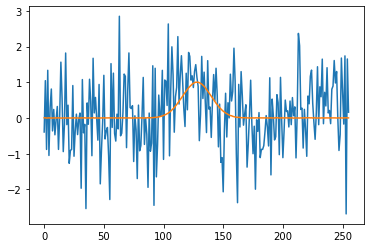

In [34]:
x=np.arange(nchan)
y=b[0,0,0,0,:]
z=b.mean(axis=0).mean(axis=0).mean(axis=0).mean(axis=0)
plt.plot(x,y)
plt.plot(x,z)
ys=y[:100].std()
zs=z[:100].std()
bdims=b.shape
print(ys,zs,ys/zs,np.sqrt(sdf.dimsize(bdims[:-1])))

